In [1]:
#lib
import os 
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import classification_report


In [2]:
#tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

# Get path 

In [3]:
no_tumor_path="./brain_tumor_dataset/no"
yes_tumor_path="./brain_tumor_dataset/yes"

# Load iamges

In [4]:
def load_image(Folder):
    images=[]
    for file_name in os.listdir(Folder):
        img=cv2.imread(os.path.join(Folder,file_name))
        if img is not None:
            img=cv2.resize(img,(128,128))
            images.append(img)
    return images

In [5]:
no_img=load_image(no_tumor_path)
yes_img=load_image(yes_tumor_path)

# make labels for images 

In [6]:
no_labels=[0]*len(no_img)
yes_labels=[1]*len(yes_img)

In [7]:
x=np.array(no_img + yes_img)
y=np.array(no_labels + yes_labels )

# Visualize some random images

<Figure size 640x480 with 0 Axes>

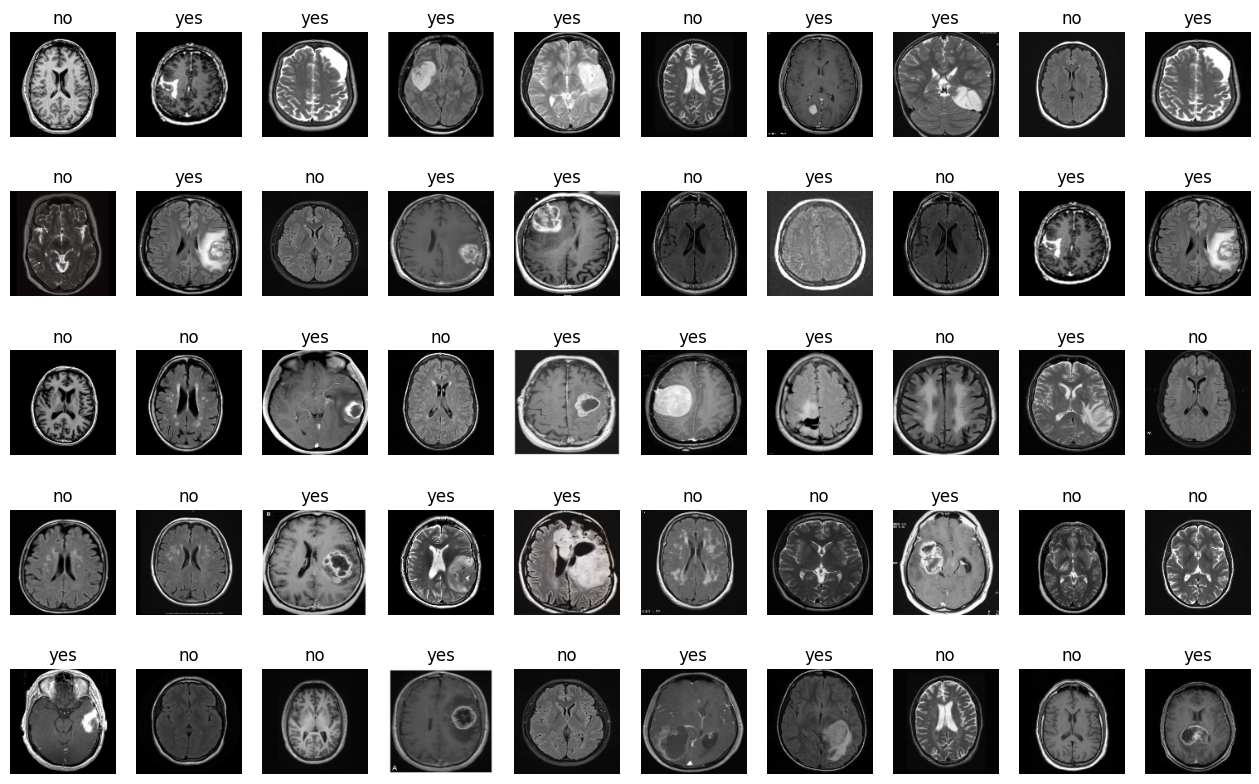

In [8]:
import random
figure = plt.figure()
plt.figure(figsize=(16,10))
num_of_images = 50 
for index in range(1, num_of_images + 1):
    Rand_image=random.randint(0,len(x)-1)
    if y[Rand_image]==0:
           class_names="no"
    else:
         class_names="yes"
    plt.subplot(5, 10, index).set_title(f'{class_names}')
    plt.axis('off')
    plt.imshow(x[Rand_image], cmap='gray_r')

# Data Preprocessing

In [9]:
x=x.astype("float32")
y=to_categorical(y,num_classes=2)

In [10]:
x/=255

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras import layers

num_classes = 2

model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=3, activation='relu', padding='same',
                  input_shape=[128, 128, 3]),
    layers.MaxPool2D(),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu', padding='same'),
    layers.MaxPool2D(),
    layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),
    layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax'),
])


print(model.summary())

D:\Users\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 128)         │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │           1,026 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,742,146 (18.09 MB)

 Trainable params: 4,742,146 (18.09 MB)

 Non-trainable params: 0 (0.00 B)

None


In [13]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = keras.optimizers.Adam(0.001),
              metrics = ['accuracy'])

In [14]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.990 and logs.get('accuracy') < 1:
            self.model.stop_training = True
            print("\nReached 99% accuracy so cancelling training!")
          
            
back = myCallback()  

In [15]:
history = model.fit(X_train, 
                    y_train,
                    epochs=20,
                    batch_size=32,
                   callbacks=[back])

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.5933 - loss: 0.6549
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.6143 - loss: 0.6597
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.7490 - loss: 0.6206
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - accuracy: 0.7621 - loss: 0.5757
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7442 - loss: 0.5007
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.7494 - loss: 0.5470
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 16s 2s/step - accuracy: 0.7686 - loss: 0.4658
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.7845 - loss: 0.3623
Epoch 9/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.8947 - loss: 0.2880
Epoch 10/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9106 - loss: 0.2533
Epoch 11/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.8917 - loss: 0.2728
Epoch 12/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9236 - loss: 0.1756
E

In [16]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 742ms/step


In [17]:
print("Classification Report:\n", classification_report(y_true, y_pred_classes))

Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.87      0.72        15
           1       0.93      0.78      0.85        36

    accuracy                           0.80        51
   macro avg       0.78      0.82      0.79        51
weighted avg       0.84      0.80      0.81        51



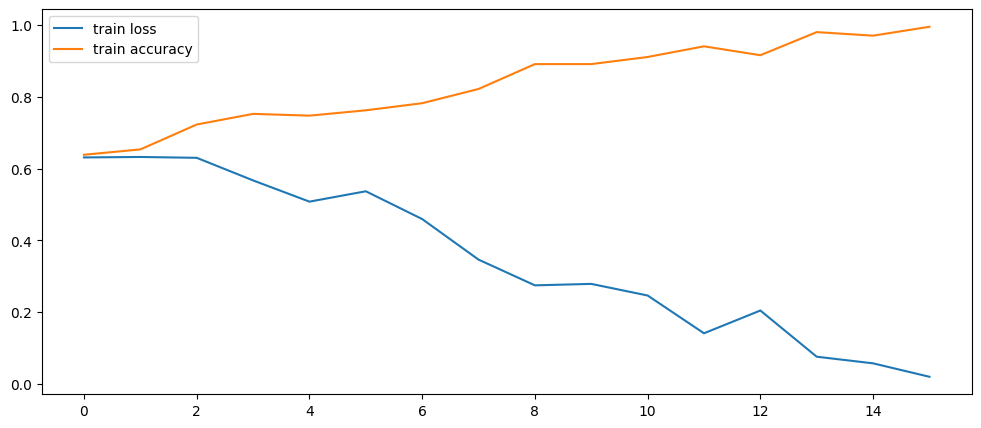

In [18]:
fig, ax = plt.subplots(figsize=(12,5))

ax.plot(history.history['loss'],label='train loss')

ax.plot(history.history['accuracy'],label='train accuracy')

ax.legend()

plt.show()

In [26]:
model.save("brain_tumor_cnn_model.h5")

In [27]:
from tensorflow.keras.models import load_model

# Load the model
model = load_model("brain_tumor_cnn_model.h5")


In [29]:
import cv2
import numpy as np

def preprocess_image(image_path):
    # Load the image
    img = cv2.imread(image_path)
    # Resize to match input size
    img = cv2.resize(img, (128, 128))
    # Normalize the image
    img = img / 255.0
    # Expand dimensions to match model's input shape
    img = np.expand_dims(img, axis=0)
    return img

# Load and preprocess the image
image_path = "./yes/Y1.jpg"
image = preprocess_image(image_path)

# Make a prediction
prediction = model.predict(image)
predicted_class = np.argmax(prediction)

# Output the prediction
if predicted_class == 1:
    print("Tumor detected")
else:
    print("No tumor detected")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
Tumor detected


In [30]:
import tensorflow as tf
print(tf.__version__)


2.18.0
